# **Project Introduction**

This analysis is inspired by the 2024 movie *Nightb\*tch*, starring Amy Adams, which portrays a woman’s struggle with postpartum depression and the societal pressures on women to maintain normalcy. The movie sheds light on the complexities of postpartum mental health, and after watching it, I felt motivated to explore this subject further. While researching, I stumbled upon a dataset on Kaggle related to postpartum depression. This project aims to conduct an in-depth analysis to identify patterns, derive insights, and explore potential factors influencing postpartum anxiety and depression. 


## **Step 1 : Load the Dataset**
To start, we load the dataset and take an initial look at its contents.

**Objective:**
- Load the dataset into a DataFrame.
- Preview the dataset to get an initial understanding of its structure and contents.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
post_df = pd.read_csv('post natal data.csv')

# First look
post_df

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


At the first glance of the dataset, we can observe that:

- The dataset contains 11 columns and 1503 rows.
- The first 9 columns appear to be categorical, representing various aspects like emotional states, behaviors, and actions related to postpartum depression.
- The target column in the dataset could be `Feeling anxious`, as it indicates the anxiety level, which could be used to predict the presence of postpartum depression.

## **Step 2: Data Preprocessing and Exploratory Data Analysis (EDA)**

- **Clean the data**: We'll check for any missing values, incorrect data types, or any other inconsistencies.
- **Handle categorical data**: Convert categorical features (like "Yes"/"No" or "Age" ranges) to numerical representations, as these will be useful for analysis.
- Perform **exploratory data analysis (EDA)** to understand data distributions, identify patterns, and detect anomalies.

In [28]:
# Seeing info
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [29]:
# Descriptive statistics
post_df.describe()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,90,5,3,3,3,3,3,2,3,3,3
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,51,364,536,555,640,583,841,980,624,557,709


In [30]:
# Check for missing values
post_df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [31]:
# Fill missing values with the mode (most frequent value)
post_df['Irritable towards baby & partner'] = post_df['Irritable towards baby & partner'].fillna(post_df['Irritable towards baby & partner'].mode()[0])
post_df['Problems concentrating or making decision'] = post_df['Problems concentrating or making decision'].fillna(post_df['Problems concentrating or making decision'].mode()[0])
post_df['Feeling of guilt'] = post_df['Feeling of guilt'].fillna(post_df['Feeling of guilt'].mode()[0])

post_df.isnull().sum()

Timestamp                                    0
Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [32]:
# Check unique values in each column
for column in post_df.columns:
    print(f"Unique values in '{column}': {post_df[column].unique()}")

Unique values in 'Timestamp': ['6/14/2022 20:02' '6/14/2022 20:03' '6/14/2022 20:04' '6/14/2022 20:05'
 '6/14/2022 20:06' '6/14/2022 20:07' '6/14/2022 20:11' '6/14/2022 22:04'
 '6/14/2022 22:05' '6/14/2022 22:06' '6/14/2022 22:07' '6/14/2022 22:08'
 '6/14/2022 22:09' '6/14/2022 22:10' '6/14/2022 22:15' '6/14/2022 22:16'
 '6/14/2022 22:17' '6/14/2022 22:18' '6/14/2022 23:25' '6/14/2022 23:26'
 '6/14/2022 23:27' '6/14/2022 23:28' '6/14/2022 23:29' '6/14/2022 23:30'
 '6/14/2022 23:31' '6/14/2022 23:32' '6/14/2022 23:33' '6/14/2022 23:34'
 '6/14/2022 23:35' '6/14/2022 23:36' '6/14/2022 23:37' '6/14/2022 23:38'
 '6/14/2022 23:39' '6/14/2022 23:40' '6/14/2022 23:41' '6/14/2022 23:42'
 '6/14/2022 23:43' '6/14/2022 23:44' '6/14/2022 23:45' '6/14/2022 23:46'
 '6/14/2022 23:47' '6/14/2022 23:48' '6/14/2022 23:49' '6/14/2022 23:50'
 '6/14/2022 23:52' '6/14/2022 23:53' '6/15/2022 0:02' '6/15/2022 0:06'
 '6/15/2022 0:07' '6/15/2022 0:10' '6/15/2022 0:11' '6/15/2022 0:12'
 '6/15/2022 0:13' '6/15/202

### Visualizing the Distribution of Columns Using Pie Charts and Histograms

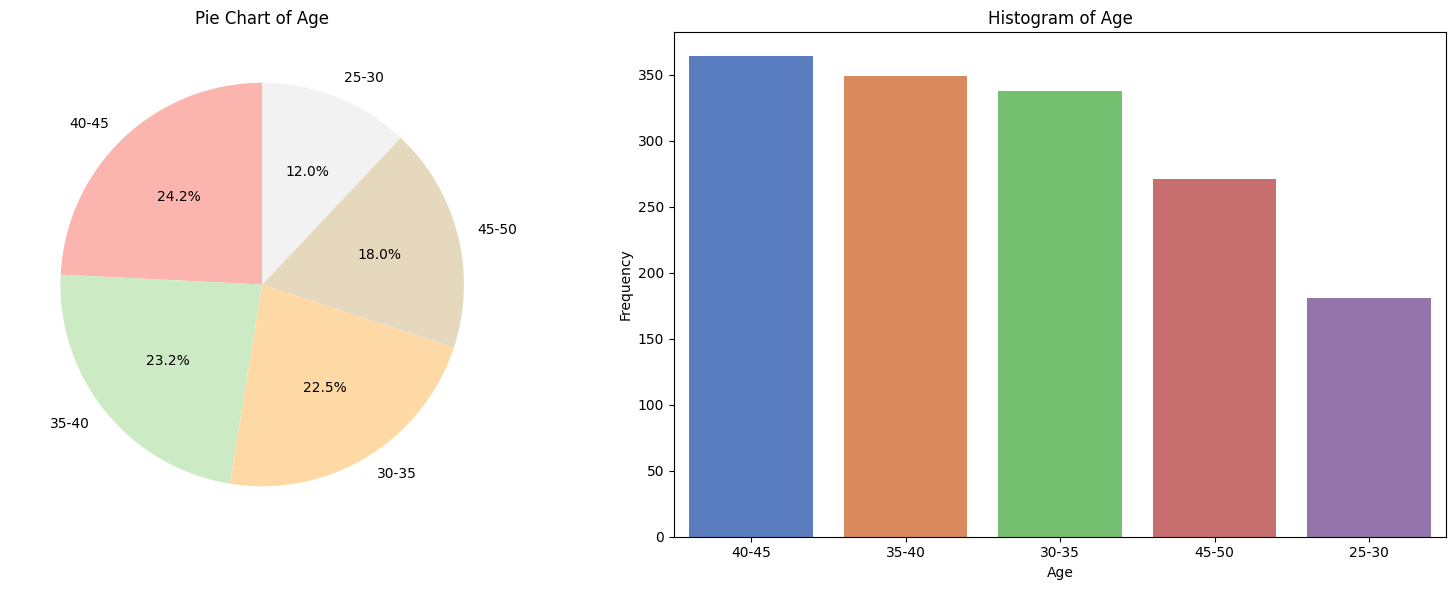

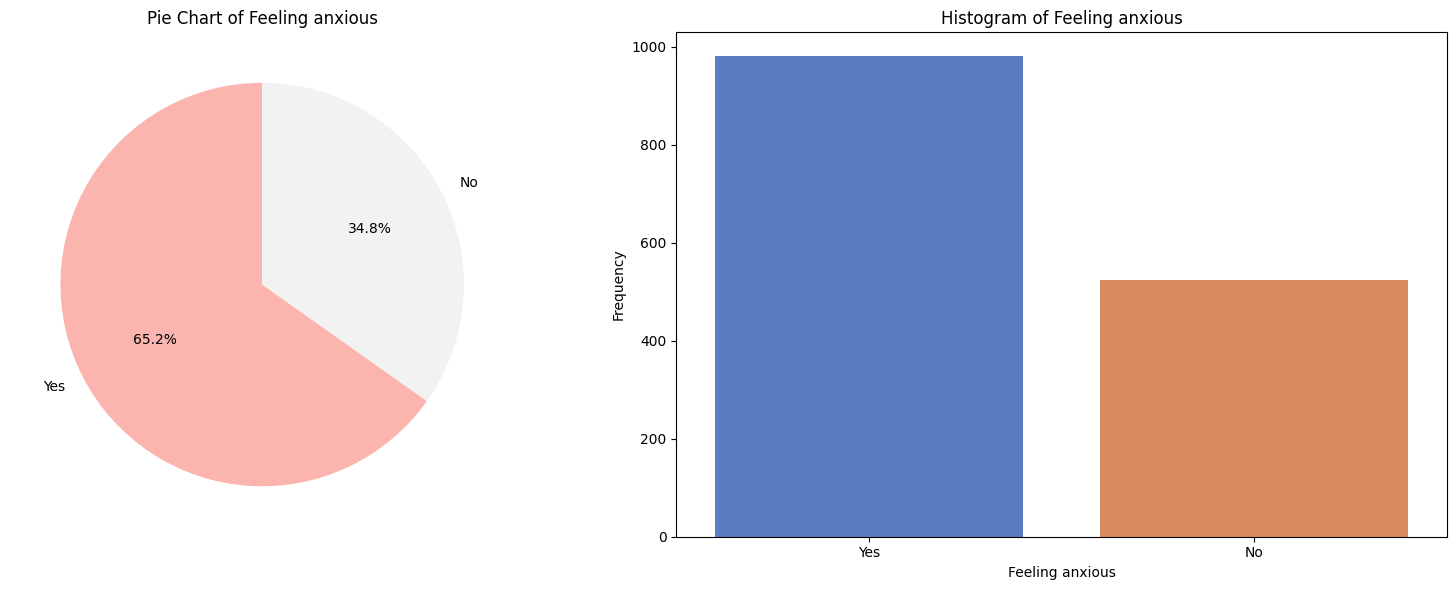

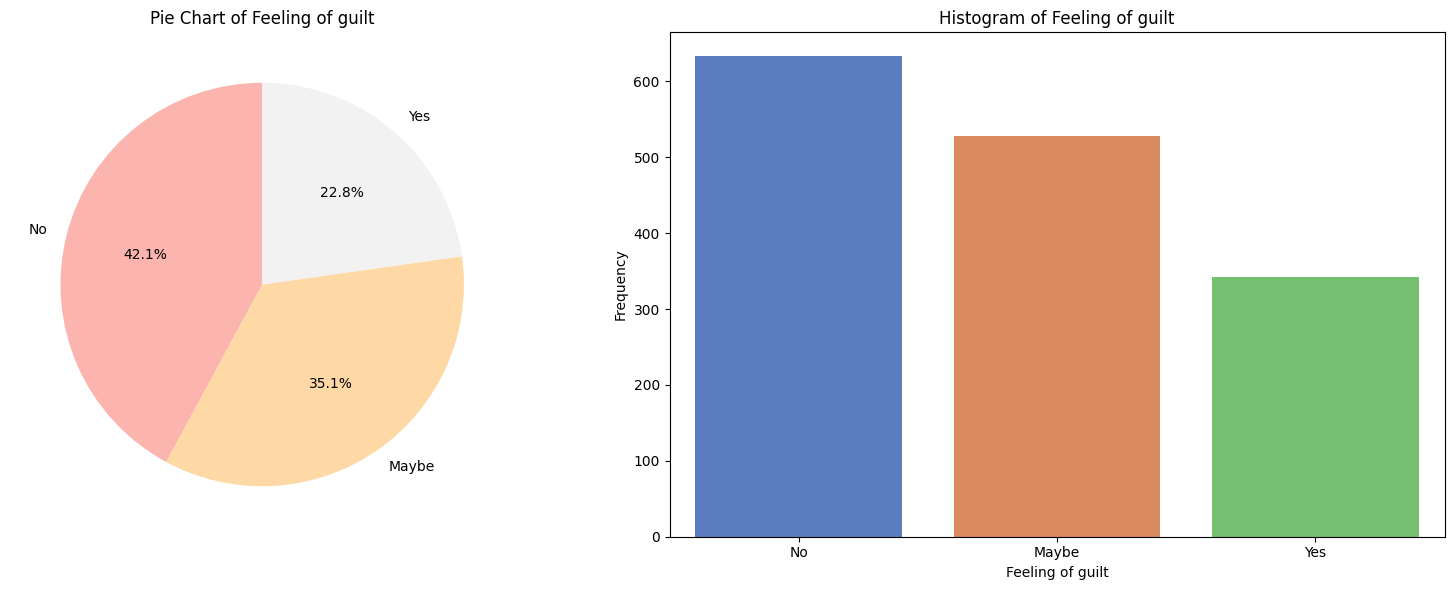

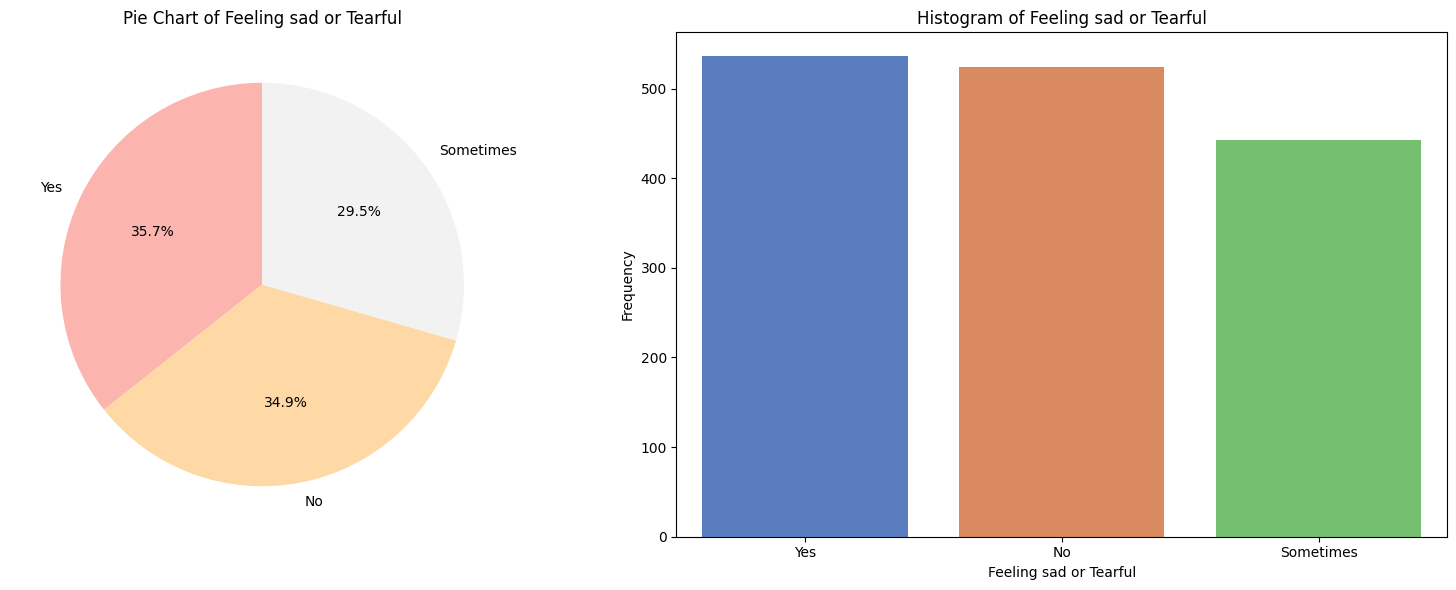

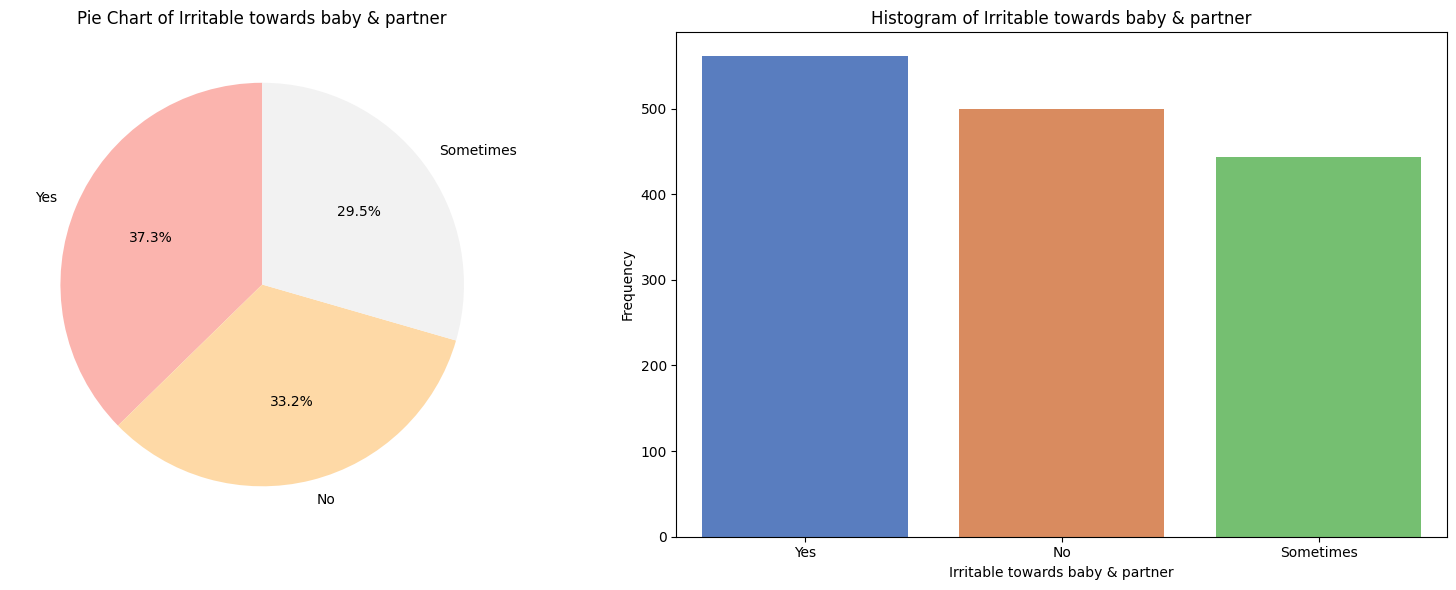

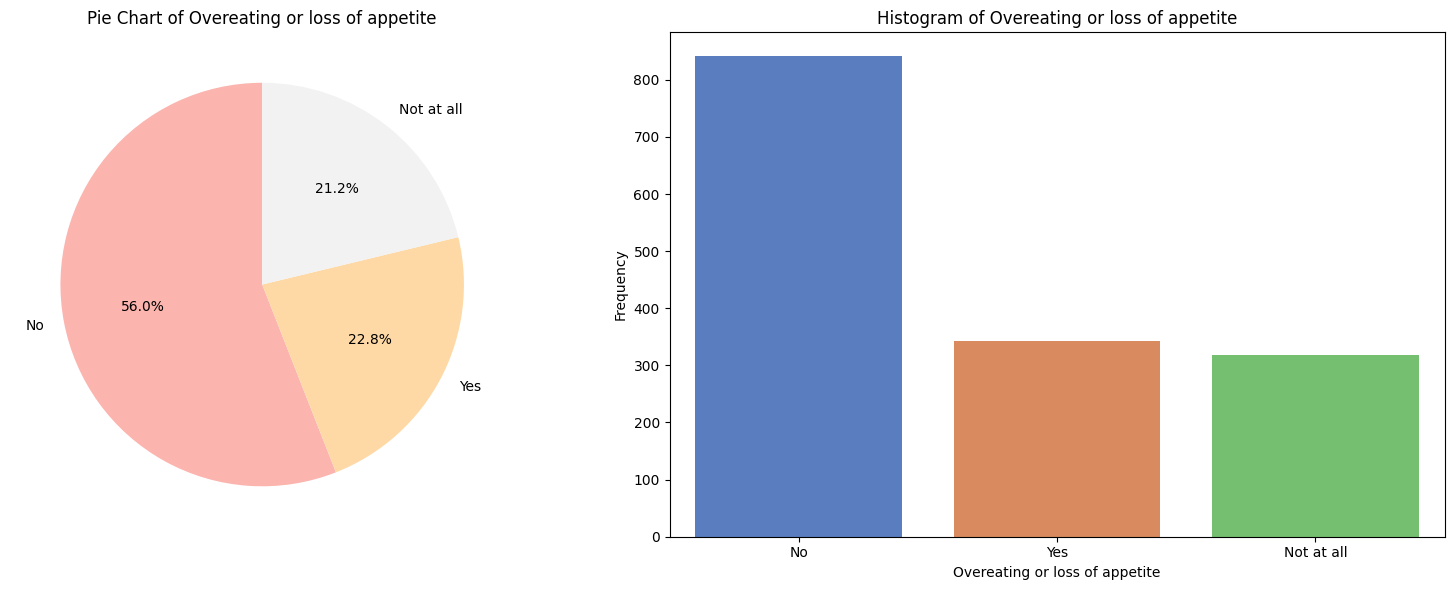

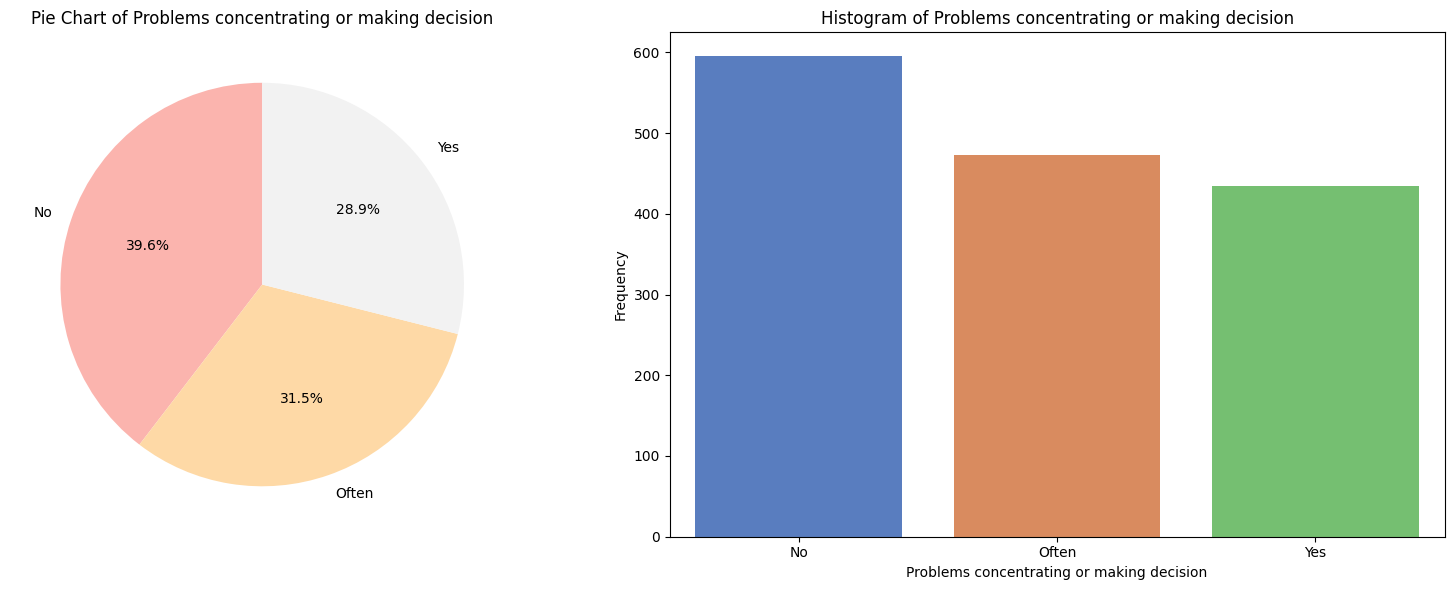

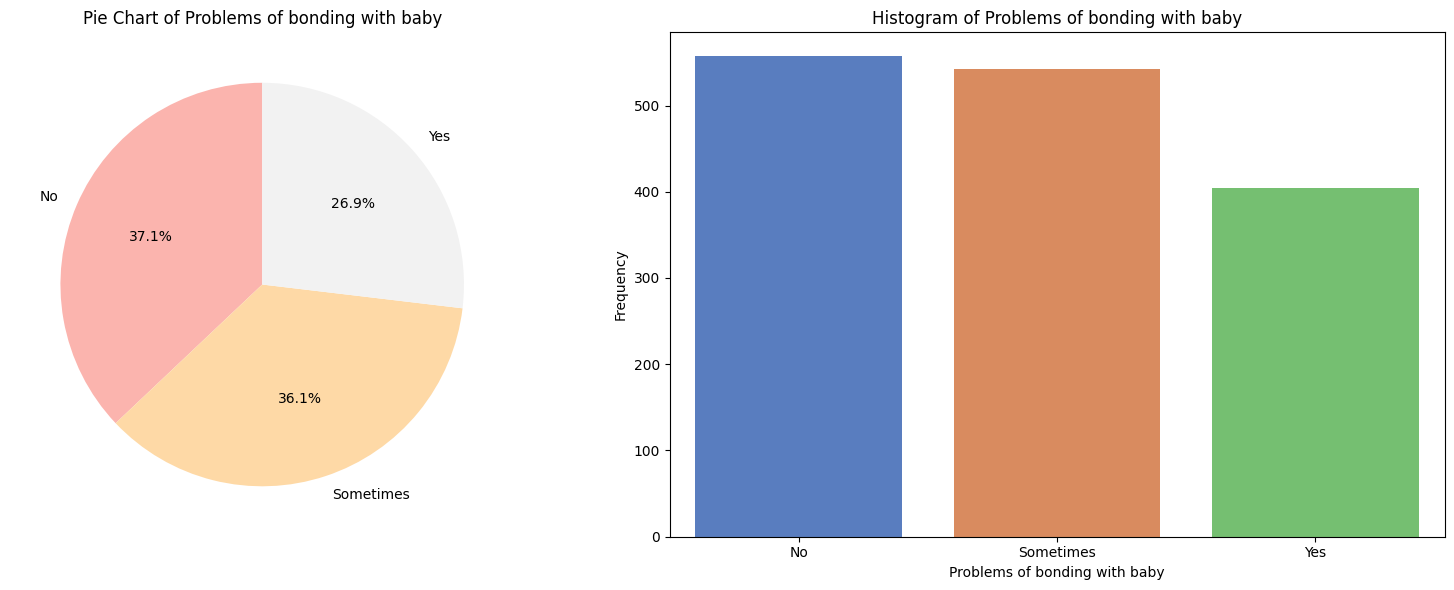

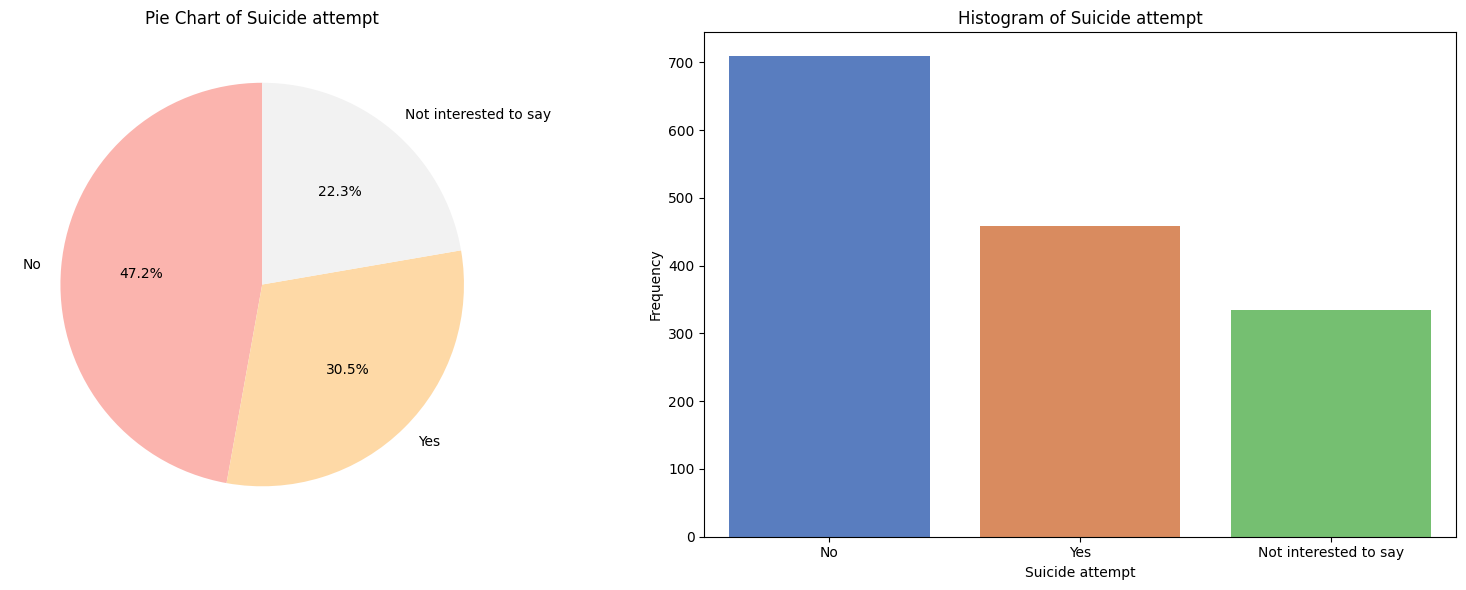

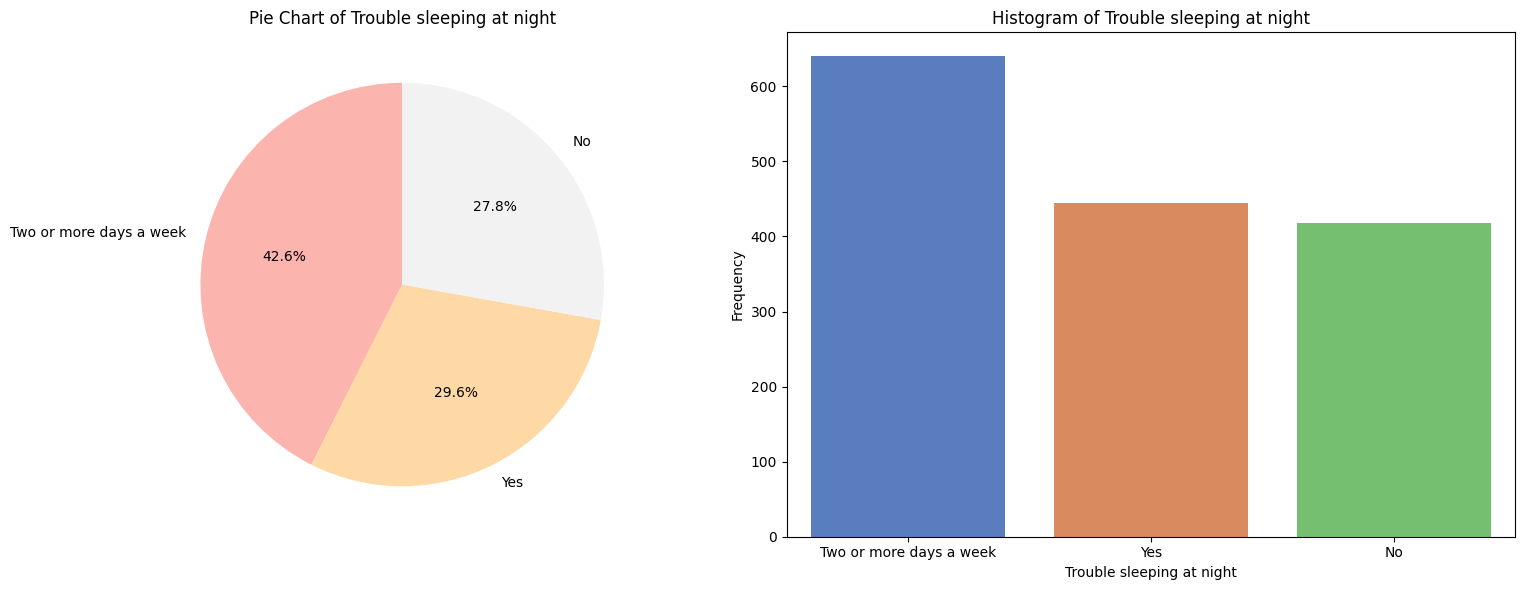

In [33]:
# Exclude the Timestamp column
columns_to_visualize = post_df.columns.difference(['Timestamp'])

# Loop through each column to generate visualizations
for column in columns_to_visualize:
    plt.figure(figsize=(16, 6))
    
    # Create a pie chart (Left)
    plt.subplot(1, 2, 1)
    post_df[column].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, cmap='Pastel1', legend=False
    )
    plt.title(f"Pie Chart of {column}")
    plt.ylabel("")  # Remove y-axis label for clarity

    # Create a histogram or bar chart (Right)
    plt.subplot(1, 2, 2)
    if post_df[column].dtype == 'object':  # For categorical data
        sns.barplot(
            x=post_df[column].value_counts().index,
            y=post_df[column].value_counts().values,
            palette='muted',
            hue=post_df[column].value_counts().index,  # Set x variable to hue
            dodge=False,  # Avoid unnecessary adjustments
            legend=False  # Suppress legend
        )
        plt.ylabel("Frequency")
        plt.xlabel(column)
    else:  # For numerical data
        sns.histplot(post_df[column], bins=10, kde=True, color='skyblue')
        plt.ylabel("Frequency")
        plt.xlabel(column)
    
    plt.title(f"Histogram of {column}")

    plt.tight_layout()
    plt.show()

### Transformation Process
I mapped the Age column to numeric midpoint values and converted the Timestamp to datetime format. For the categorical columns like Feeling sad or Tearful and Suicide attempt, I mapped them to numeric values (e.g., 'Yes' to 1, 'No' to 0) to simplify the analysis.

In [34]:
# Check the original unique values in the 'Age' column
post_df['Age'].unique()

array(['35-40', '40-45', '30-35', '45-50', '25-30'], dtype=object)

In [35]:
# Midpoint mapping for Age
age_mapping = {
    '25-30': 27.5,
    '30-35': 32.5,
    '35-40': 37.5,
    '40-45': 42.5,
    '45-50': 47.5
}
post_df['Age'] = post_df['Age'].map(age_mapping)

post_df['Age'].unique()

array([37.5, 42.5, 32.5, 47.5, 27.5])

In [36]:
# Convert 'Timestamp' to datetime format
post_df['Timestamp'] = pd.to_datetime(post_df['Timestamp'])
post_df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2022-06-14 20:02:00,37.5,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,2022-06-14 20:03:00,42.5,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,2022-06-14 20:04:00,37.5,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,2022-06-14 20:05:00,37.5,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,2022-06-14 20:06:00,42.5,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [37]:
# Create a dictionary of mappings for each column
mappings = {
    'Feeling sad or Tearful': {'Yes': 1, 'No': 0, 'Sometimes': 0.5},
    'Irritable towards baby & partner': {'Yes': 1, 'No': 0, 'Sometimes': 0.5},
    'Trouble sleeping at night': {'Yes': 1, 'No': 0, 'Two or more days a week': 2, 'Often': 2},
    'Problems concentrating or making decision': {'Yes': 1, 'No': 0, 'Often': 0.5},
    'Overeating or loss of appetite': {'Yes': 1, 'No': 0, 'Not at all': 0},
    'Feeling anxious': {'Yes': 1, 'No': 0},
    'Feeling of guilt': {'Yes': 1, 'No': 0, 'Maybe': 0.5},
    'Problems of bonding with baby': {'Yes': 1, 'No': 0, 'Sometimes': 0.5},
    'Suicide attempt': {'Yes': 1, 'No': 0, 'Not interested to say': 0.5}
}

# Apply mappings and check for any unmapped values
for column, mapping in mappings.items():
    post_df[column] = post_df[column].map(mapping)
    # Check if any values weren't mapped (will show as NaN)
    if post_df[column].isnull().any():
        print(f"Warning: Unmapped values in {column}:")
        print(post_df[post_df[column].isnull()][column].unique())

# Verify the conversion
print("\nVerification of first few rows:")
print(post_df[mappings.keys()].head())


Verification of first few rows:
   Feeling sad or Tearful  Irritable towards baby & partner  \
0                     1.0                               1.0   
1                     1.0                               0.0   
2                     1.0                               0.0   
3                     1.0                               1.0   
4                     1.0                               0.0   

   Trouble sleeping at night  Problems concentrating or making decision  \
0                          2                                        1.0   
1                          0                                        1.0   
2                          1                                        1.0   
3                          1                                        1.0   
4                          2                                        1.0   

   Overeating or loss of appetite  Feeling anxious  Feeling of guilt  \
0                               1                1               

## Demographic Analysis
In this analysis, I'm exploring how different emotional states, like feeling sad, anxious, or irritable, vary across age groups. I also look at how these emotional states might relate to suicide attempts.

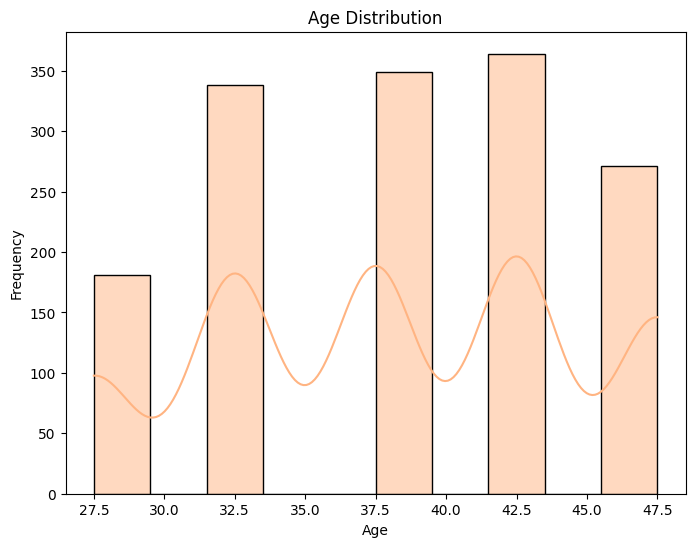

In [38]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(post_df['Age'], bins=10, kde=True, color=sns.color_palette("pastel")[1])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution shows clear peaks around the early 30s, early 40s, and mid-40s, meaning these age groups are more common in the dataset. The smooth KDE curve also shows patterns, suggesting some age ranges are more affected by postpartum depression.

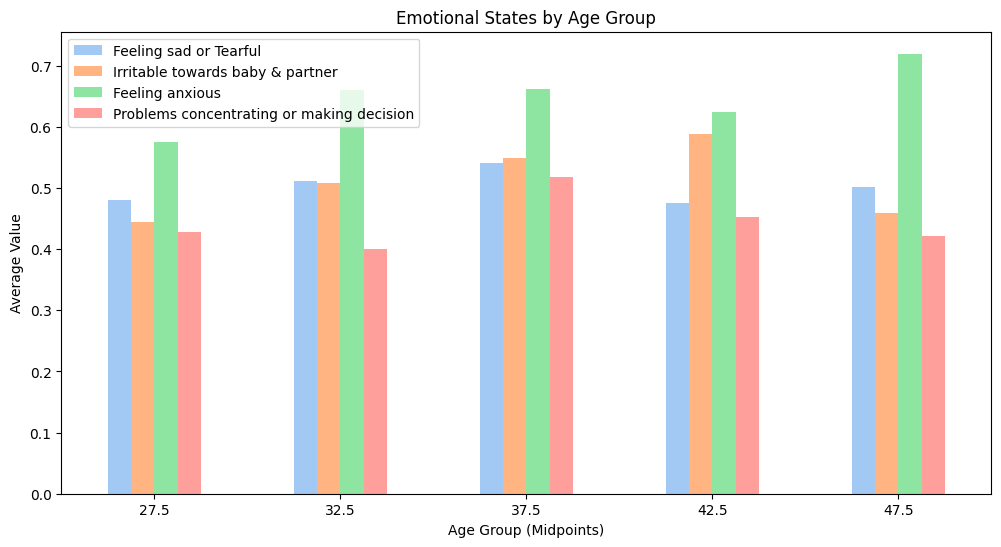

In [39]:
# Plotting emotional states by age group
emotional_vars = ['Feeling sad or Tearful', 'Irritable towards baby & partner', 'Feeling anxious', 'Problems concentrating or making decision']

# Group by Age and calculate the mean for emotional states
age_grouped = post_df.groupby('Age')[emotional_vars].mean()

# Plotting a grouped bar chart 
age_grouped.plot(kind='bar', figsize=(12, 6), color=sns.color_palette("pastel"))
plt.title('Emotional States by Age Group')
plt.xlabel('Age Group (Midpoints)')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

From the chart, "Feeling anxious" seems to be the most common emotional state in all age groups, followed by irritability and trouble concentrating. The levels of these emotions stay fairly consistent, with some slight differences across ages.

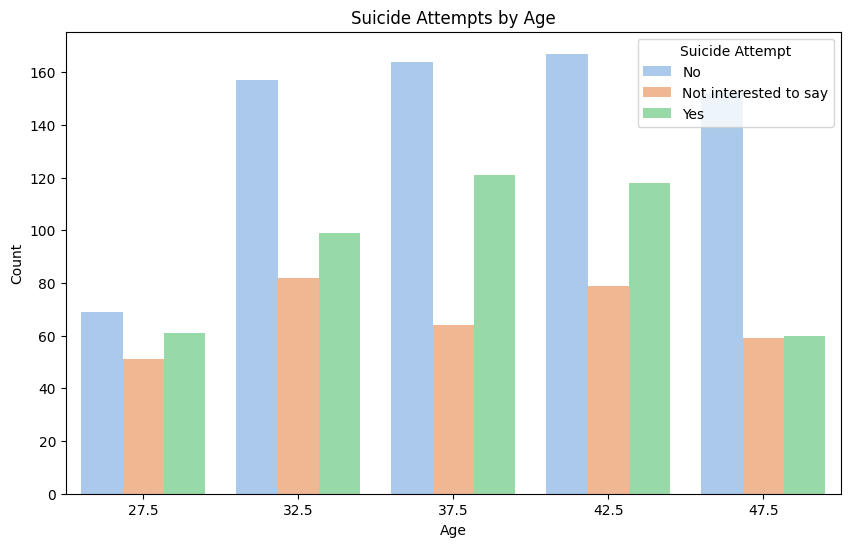

In [40]:
# Age vs Suicide Attempts (Midpoint Age)
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Suicide attempt', data=post_df, palette="pastel")

# Customizing title and labels
plt.title('Suicide Attempts by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Custom legend labels
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['No', 'Not interested to say', 'Yes']
plt.legend(handles=handles, labels=custom_labels, title='Suicide Attempt')

plt.show()

Most people in all age groups said "No" to attempting suicide, but there’s a noticeable number who said "Yes" in the 30-35 and 40-45 age groups. Very few chose "Not interested to say."

## Emotional State Patterns
To identify patterns and correlations between different emotional states, I looked at how they relate to one another. For instance, I wanted to see if emotional states like "Feeling sad or Tearful" are often linked with others like "Feeling anxious" or "Trouble sleeping at night".

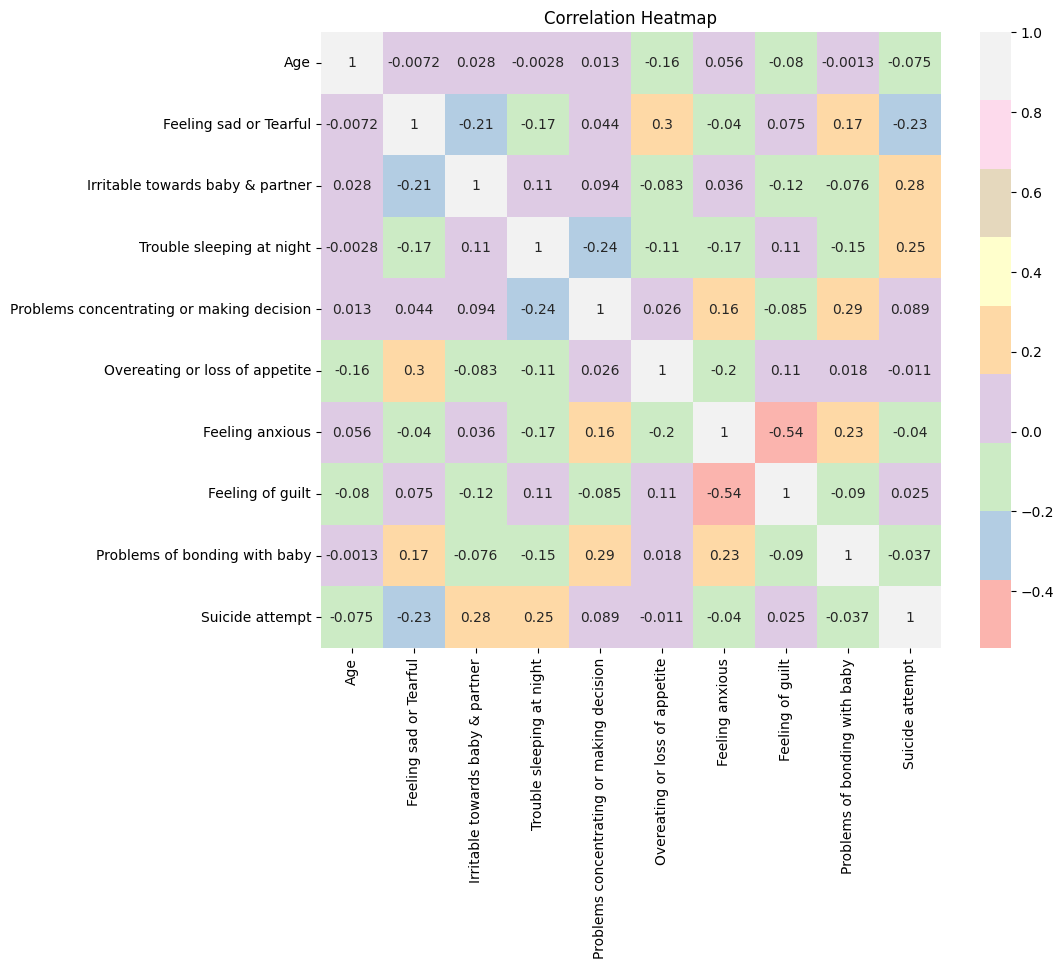

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(post_df.drop(columns=["Timestamp"]).corr(), annot=True, cmap="Pastel1")  
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap reveals that suicide attempts are positively correlated with trouble sleeping (0.25) and irritability towards baby/partner (0.28), indicating these could be important warning signs. Most other correlations are relatively weak, though there's a notable negative correlation between anxiety and guilt (-0.54), suggesting these emotions tend not to occur together in this context.

## **Step 3 : Splitting the data and choosing the right algorithm**

To prepare the dataset for analysis, I split it into training (80%) and testing (20%) sets, ensuring the target variable's distribution was preserved using 'stratify=y'. This approach allows me to explore relationships between emotional states, such as whether "Feeling anxious" is linked to other states like "Feeling sad or Tearful," while maintaining a balanced and reproducible dataset for reliable modeling.

In [42]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = post_df.drop(columns=['Feeling anxious','Timestamp'])  # Drop target variable and Timestamp
y = post_df['Feeling anxious']  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (1202, 9), Testing set: (301, 9)


Right now, I’m testing out different models - like Logistic Regression, SVM, Random Forest, and XGBoost - to see which one best captures the patterns in emotional states such as 'Feeling anxious.' Each model has its strengths, and by comparing how they perform, I’m hoping to find the sweet spot between accuracy and simplicity. 

In [44]:
# Testing Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predictions and evaluation can be done after this step
y_pred = model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9933554817275747
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.99      0.99       196

    accuracy                           0.99       301
   macro avg       0.99      0.99      0.99       301
weighted avg       0.99      0.99      0.99       301



In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8571428571428571
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       105
           1       0.87      0.92      0.89       196

    accuracy                           0.86       301
   macro avg       0.85      0.83      0.84       301
weighted avg       0.86      0.86      0.85       301



In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model
svm = SVC(kernel='linear')  

# Train the model
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm}')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.8604651162790697
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       105
           1       0.87      0.92      0.90       196

    accuracy                           0.86       301
   macro avg       0.85      0.84      0.84       301
weighted avg       0.86      0.86      0.86       301



In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9634551495016611
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       105
           1       0.99      0.95      0.97       196

    accuracy                           0.96       301
   macro avg       0.95      0.97      0.96       301
weighted avg       0.97      0.96      0.96       301



C:\Users\hafsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:11:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After testing Logistic Regression, SVM, XGBoost, and Random Forest, I found that Random Forest performed the best. While XGBoost had good accuracy (96.35%), Random Forest achieved 99.33% accuracy, with perfect precision (1.00) and the highest recall (0.99) for high-risk cases, meaning it misses the least number of actual high-risk cases. Since accurately identifying high-risk individuals is the priority, Random Forest is the best choice because it is reliable, handles complex patterns well, and ensures the most accurate predictions. 

## **Step 4 : Evaluating our algorithm**

In [62]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  

# Print the results
print("Cross-validation scores for each fold: ", cv_scores)
print("Average cross-validation score: ", np.mean(cv_scores))

Cross-validation scores for each fold:  [0.98755187 0.98340249 0.96666667 0.97916667 0.99166667]
Average cross-validation score:  0.9816908713692947


The high cross-validation score further supports that Random Forest is a robust and reliable model for this task, and its performance is consistent across different subsets of the training data.

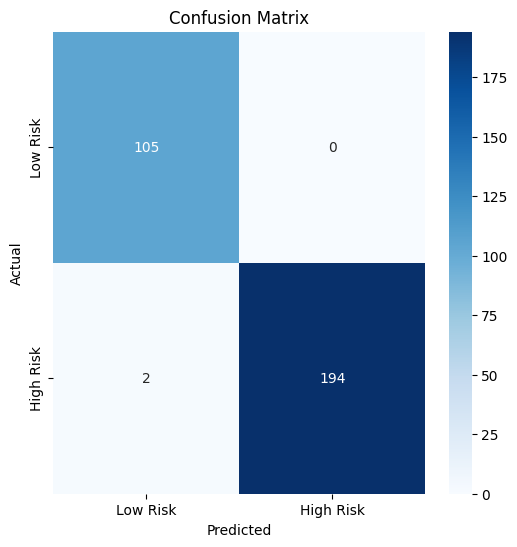

In [61]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix results indicate that the model is performing excellently. It correctly identified **105 low-risk cases** and **194 high-risk cases**, with no **false positives** (no low-risk cases misclassified as high risk). However, it did miss **2 high-risk cases**, which were incorrectly classified as low risk, representing a small number of false negatives. Overall, the model shows high precision and recall, particularly for high-risk cases, making it highly reliable, with minimal errors.

## **Step 4 : Interpreting the results**

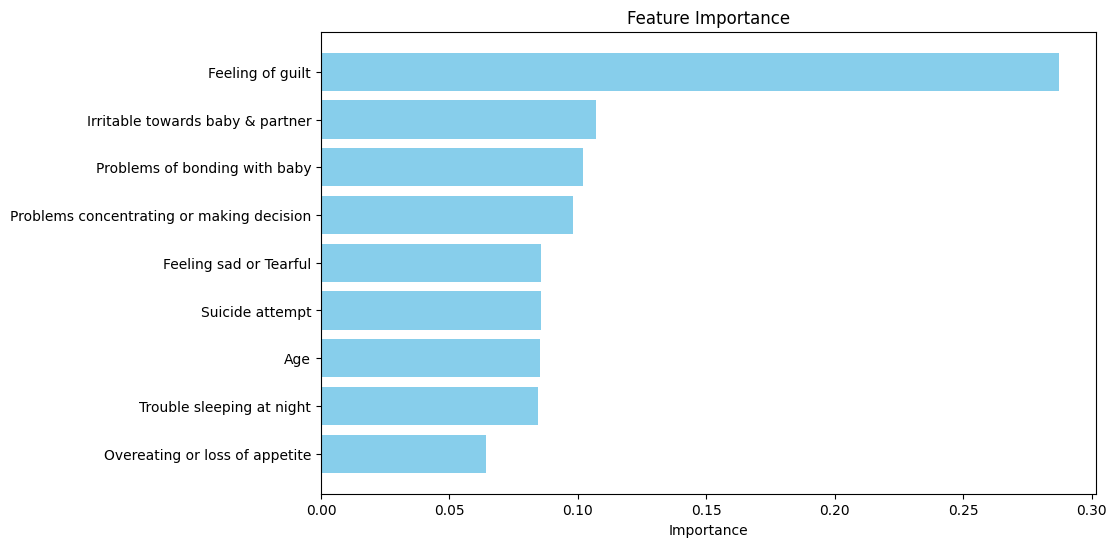

In [63]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Now, extract feature importances
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert to have the most important feature at the top
plt.show()

### **Feature Importance Analysis:**

The feature importance analysis indicates that the most significant predictors of postpartum depression in the model are **Feeling of Guilt**, **Problems Bonding with Baby**, and **Irritability Towards Baby & Partner**. These features are strongly associated with the emotional and behavioral symptoms of postpartum depression, suggesting that these factors play a key role in predicting the condition. Following these, emotional and cognitive symptoms such as **Feeling Sad** and **Problems Concentrating** also emerge as important predictors, highlighting the connection between mood disturbances and postpartum depression.

In contrast, features like **Age** and **Overeating or Loss of Appetite** show a **lower impact** on predicting postpartum depression risk. While these factors are still relevant, they do not contribute as significantly to the model's decision-making process in this particular dataset.

This analysis helps us understand which emotional, cognitive, and behavioral factors are most closely linked to postpartum depression, and can guide future data collection or feature engineering efforts to improve the model.

## **Step 5 : Model Deployment via Streamlit App**

In [50]:
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

After training and saving the **Random Forest model**, I deployed it in a **Streamlit web application**. This allows users to **interactively input data** and receive **real-time predictions** based on the model. 

The following steps were taken:
1. The trained model was **saved using Joblib** (`joblib.dump(model, 'random_forest_model.pkl')`).
2. The saved model was then loaded into the Streamlit app, where users could input various features (such as **Feeling Sad**, **Irritable**, etc.) to get a prediction on the likelihood of postpartum depression.
3. The app provides an intuitive interface with dropdowns, sliders, and buttons to make predictions without needing any technical expertise.

By deploying the model with **Streamlit**, it is now accessible for **real-time use**, making it easy to predict postpartum depression risk based on user inputs.